<a href="https://colab.research.google.com/github/shoulhafiz/python_data_science/blob/master/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [12]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8954366952619249161
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 13738898916378863075
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 10839950749418092712
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11330115994
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6266767795832826728
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [13]:
!nvidia-smi

Wed Nov 20 06:08:16 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.50       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    60W / 149W |    158MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [14]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [15]:
train_X = mnist.train._images
train_Y = mnist.train._labels

test_X = mnist.test._images
test_Y = mnist.test._labels

train_X.shape

(55000, 784)

In [0]:
class NN:
  def __init__(self, hidden1, hidden2, learning_rate):
    self.X = tf.placeholder(tf.float32, (None, 784))
    self.Y = tf.placeholder(tf.int32, (None))

    forward = tf.layers.dense(self.X, hidden1)
    activate = tf.nn.relu(forward)

    forward = tf.layers.dense(activate, hidden2)
    activate = tf.nn.relu(forward)

    logits = tf.layers.dense(forward, 10)
    self.logits = tf.nn.softmax(logits)

    self.cost = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = self.Y, 
                                                               logits = logits)
    self.cost = tf.reduce_mean(self.cost)

    self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(self.cost)

    correct_pred = tf.equal(
            tf.argmax(self.logits, 1, output_type = tf.int32), self.Y
        )
    self.accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [17]:
#tf.reset_default_graph()
model = NN(100, 100, learning_rate = 1e-3)
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [0]:
epoch = 10
batch_size = 128

In [0]:
from tqdm import tqdm

train_accuracies, train_losses = [], []
test_accuracies, test_losses = [], []


In [20]:
import numpy as np

for i in range(epoch):

  train_acc, train_loss = [], []
  test_acc, test_loss = [], []
  for k in tqdm(range(0, len(train_X), batch_size)):
    index = min(len(train_X), k + batch_size)
    batch_x = train_X[k: index]
    batch_y = train_Y[k: index]

    loss, acc, _ = sess.run([model.cost, model.accuracy, model.optimizer],
                            feed_dict = {model.X: batch_x, model.Y: batch_y})
    
    train_loss.append(loss)
    train_acc.append(acc)

  for k in tqdm(range(0, len(test_X), batch_size)):
    index = min(len(test_X), k + batch_size)
    batch_x = test_X[k: index]
    batch_y = test_Y[k: index]

    loss, acc = sess.run([model.cost, model.accuracy],
                            feed_dict = {model.X: batch_x, model.Y: batch_y})
    
    test_loss.append(loss)
    test_acc.append(acc)
  
  train_loss = np.mean(train_loss)
  train_acc = np.mean(train_acc)
  test_loss = np.mean(test_loss)
  test_acc = np.mean(test_acc)

  train_accuracies.append(train_acc)
  train_losses.append(train_loss)
  test_accuracies.append(test_acc)
  test_losses.append(test_loss)

  print()
  print('epoch %d, avg train acc %f, avg test acc %f'% (i, train_acc, test_acc))

  9%|▉         | 39/430 [00:00<00:01, 388.83it/s]


epoch 0, avg train acc 0.897413, avg test acc 0.936412


 10%|▉         | 42/430 [00:00<00:00, 419.95it/s]


epoch 1, avg train acc 0.952428, avg test acc 0.957773


  9%|▉         | 40/430 [00:00<00:00, 391.67it/s]


epoch 2, avg train acc 0.966099, avg test acc 0.961036


  8%|▊         | 34/430 [00:00<00:01, 324.27it/s]


epoch 3, avg train acc 0.974628, avg test acc 0.966871


 10%|▉         | 41/430 [00:00<00:00, 401.17it/s]


epoch 4, avg train acc 0.980642, avg test acc 0.970431


  9%|▉         | 40/430 [00:00<00:00, 391.80it/s]


epoch 5, avg train acc 0.985003, avg test acc 0.972805


  9%|▉         | 40/430 [00:00<00:00, 396.91it/s]


epoch 6, avg train acc 0.988455, avg test acc 0.970629


 10%|▉         | 42/430 [00:00<00:00, 417.99it/s]


epoch 7, avg train acc 0.990453, avg test acc 0.969047


  8%|▊         | 36/430 [00:00<00:01, 350.39it/s]


epoch 8, avg train acc 0.992761, avg test acc 0.968552


100%|██████████| 79/79 [00:00<00:00, 595.59it/s]


epoch 9, avg train acc 0.993251, avg test acc 0.970332


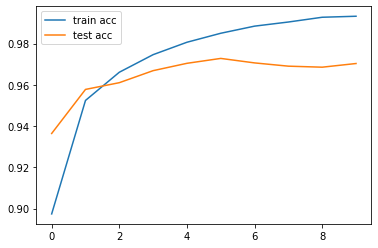

In [21]:
import matplotlib.pyplot as plt

plt.plot(train_accuracies, label = 'train acc')
plt.plot(test_accuracies, label = 'test acc')
plt.legend()
plt.show()